### Processamento de gráficos para Relatório de Conjuntura de Macroeconomia I
#### Aluno: Pedro Luís Rickli Torques
#### Semestre: 2025/1

#### Imports

In [ ]:
%pip install sgs2
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sgs2 as sgs
import time

#### Exercício 1

In [51]:
# Requisição
# A API do Bacen parece meio instável, por vezes as requisições funcionam e por vezes não
tb_divmobliq = sgs.dataframe({2216: "Dívida Mobiliária", 4382: "PIB"}, start='2002-01-01', end='2025-01-01')
time.sleep(10)
tb_NFSP = sgs.dataframe({5793: "Déficit Primário em proporção do PIB"}, start='2002-01-01', end='2025-01-01')
time.sleep(10)
jur1 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2002-01-01', end='2012-01-01')
time.sleep(10)
jur2 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2012-01-02', end='2022-01-01')
time.sleep(10)
jur3 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2022-01-02', end='2025-01-01')
tb_jur = pd.concat([jur1, jur2, jur3])
time.sleep(10)
tb_pibgrowth = sgs.dataframe({22109: "PIB"}, start='2002-01-01', end='2025-01-01')
tb_pibgrowth['Crescimento do PIB'] = tb_pibgrowth['PIB'].pct_change()*100

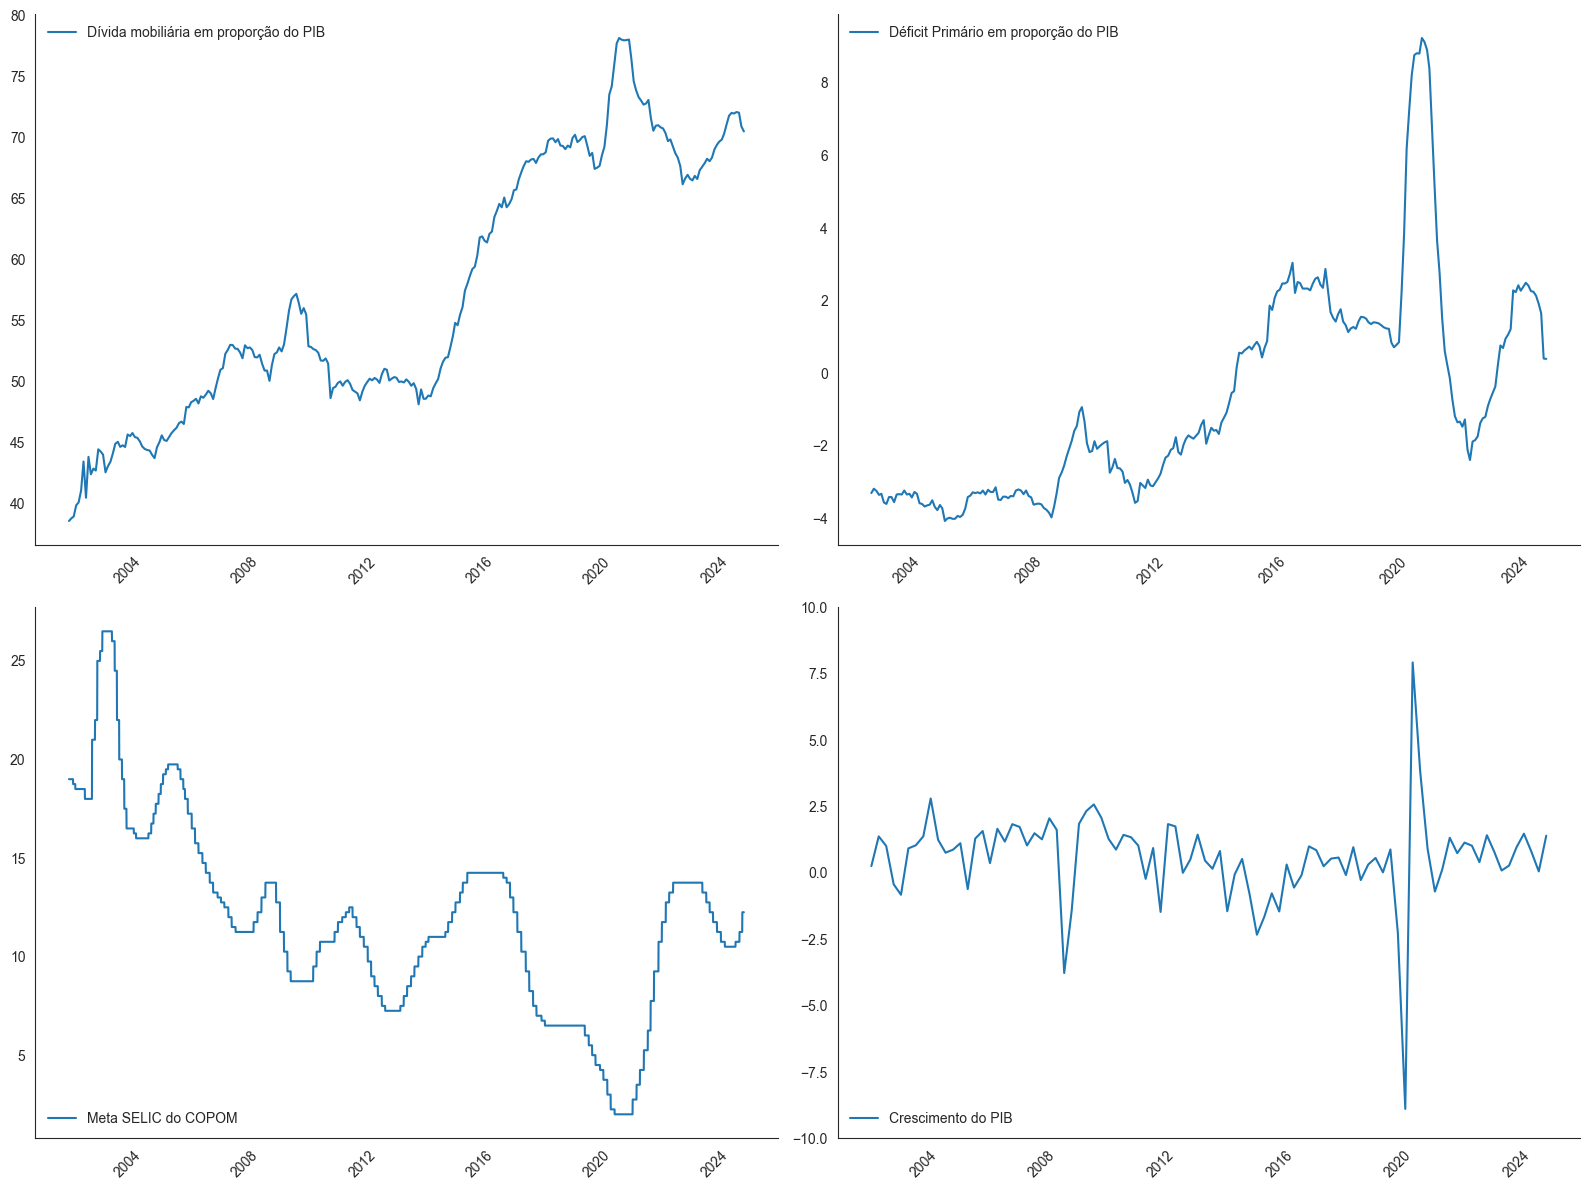

In [52]:
# Cálculo da proporção Dívida/PIB
def divpib(x):
    return (x['Dívida Mobiliária'] / x['PIB'])*100
tb_divmobliq[f'Dívida mobiliária em proporção do PIB'] = tb_divmobliq.apply(divpib, axis=1)


# Graficagem
tb_divmobliq_graf = tb_divmobliq["Dívida mobiliária em proporção do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_NFSP_graf = tb_NFSP["Déficit Primário em proporção do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_jur_graf = tb_jur["Meta SELIC do COPOM"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_pibgrowth_graf = tb_pibgrowth["Crescimento do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')

tb_jur

sns.set_style("white")

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=tb_divmobliq_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)

plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.lineplot(data=tb_NFSP_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)

plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.lineplot(data=tb_jur_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)

plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.subplot(2, 2, 4)
sns.lineplot(data=tb_pibgrowth_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.ylim(-10, 10)
sns.despine()

plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.show()